In [5]:
from src.data.makedata import internetdata
import pandas as pd
import numpy as np
from plotnine import *

# Internet Performace Datasets

https://wiki.cybera.ca/display/shareit/45613613/QAO9bc379dd5a4a49eea9a9e3d1d81be04bOFU


In [6]:
df_cira,df_mlab,df_ookla = internetdata()

## CIRA

In [7]:
df_cira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20734 entries, 0 to 20733
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TEST ID                    20734 non-null  int64  
 1   TEST DATE / UTC HOUR       20734 non-null  object 
 2   GEO LATITUDE               20734 non-null  float64
 3   GEO LONGITUDE              20734 non-null  float64
 4   DOWNLOAD SPEED             20734 non-null  float64
 5   UPLOAD SPEED               20734 non-null  float64
 6   JITTER                     15853 non-null  float64
 7   LATENCY                    15853 non-null  float64
 8   PACKET LOSS                15853 non-null  float64
 9   IPV6 SUPPORTED             20734 non-null  bool   
 10  DNSSEC SUPPORTED           20734 non-null  bool   
 11  TEST SERVER                20734 non-null  object 
 12  browser_test_url           17214 non-null  object 
 13  CONTRACTED DOWNLOAD SPEED  6511 non-null   obj

## Mlab

In [8]:
df_mlab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021143 entries, 0 to 59947
Data columns (total 20 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1021143 non-null  int64  
 1   ServerCity                                   1021143 non-null  object 
 2   ServerLat                                    1021143 non-null  float64
 3   ServerLong                                   1021143 non-null  float64
 4   ServerNetworkName                            1021143 non-null  object 
 5   ClientCountry                                1021143 non-null  object 
 6   ClientCity                                   1021143 non-null  object 
 7   ClientLat                                    1021143 non-null  float64
 8   ClientLong                                   1021143 non-null  float64
 9   RadiusKm                                     102

In [9]:
df_cen = pd.read_csv('https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/CompFile.cfm?Lang=Eng&T=301&OFT=FULLCSV', encoding='latin1')

columns = ['Geographic name, english', 'CSD type, english', 'Province / territory, english', 'Geographic code, Province / territory',
          'Population, 2016','Land area in square kilometres, 2016', 'Population density per square kilometre, 2016',
       'National population rank, 2016', 'Provincial/territorial population rank, 2016' ]
df_cen = df_cen[columns]

df_cen = df_cen[df_cen["Province / territory, english"] == "Alberta"]
df_cen.rename(columns={"Geographic name, english": "ClientCity"}, inplace=True)

In [10]:
df_cen

,ClientCity,"CSD type, english","Province / territory, english","Geographic code, Province / territory","Population, 2016","Land area in square kilometres, 2016","Population density per square kilometre, 2016","National population rank, 2016","Provincial/territorial population rank, 2016"
3892,Cypress County,Municipal district,Alberta,48.0,7662.0,13173.25,0.6,517.0,63.0
3893,Medicine Hat,City,Alberta,48.0,63260.0,112.04,564.6,87.0,8.0
3894,Forty Mile County No. 8,Municipal district,Alberta,48.0,3581.0,7249.31,0.5,902.0,109.0
3895,Foremost,Village,Alberta,48.0,541.0,2.16,250.3,2869.0,252.0
3896,Bow Island,Town,Alberta,48.0,1983.0,5.81,341.6,1355.0,151.0
...,...,...,...,...,...,...,...,...,...
4312,Peace No. 135,Municipal district,Alberta,48.0,1747.0,847.47,2.1,1483.0,160.0
4313,Berwyn,Village,Alberta,48.0,538.0,1.58,341.2,2881.0,254.0
4314,Grimshaw,Town,Alberta,48.0,2718.0,7.09,383.4,1096.0,129.0
4315,Horse Lakes 152B,Indian reserve,Alberta,48.0,469.0,14.33,32.7,3045.0,263.0


In [11]:
merged_data = pd.merge(df_mlab, df_cen, on="ClientCity", how = 'inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953384 entries, 0 to 953383
Data columns (total 28 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unnamed: 0                                     953384 non-null  int64  
 1   ServerCity                                     953384 non-null  object 
 2   ServerLat                                      953384 non-null  float64
 3   ServerLong                                     953384 non-null  float64
 4   ServerNetworkName                              953384 non-null  object 
 5   ClientCountry                                  953384 non-null  object 
 6   ClientCity                                     953384 non-null  object 
 7   ClientLat                                      953384 non-null  float64
 8   ClientLong                                     953384 non-null  float64
 9   RadiusKm                             

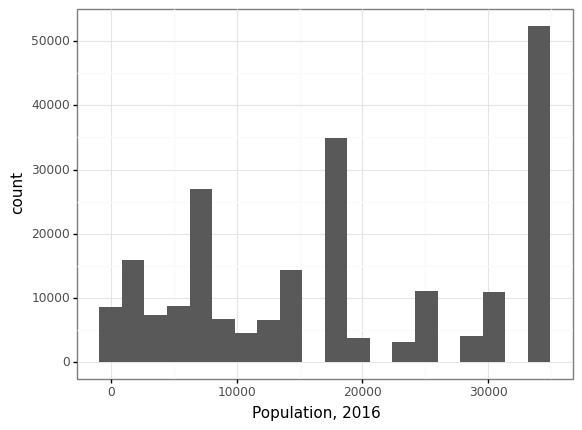

<ggplot: (-9223371868966257908)>

In [12]:
# count of mlab speed tests done by population groups
(ggplot(merged_data[merged_data['Population, 2016'] < 50000]) +
    aes(x='Population, 2016') +
    geom_histogram(bins=20) +
    theme_bw())

# look at distribution of speed tests by population bin

C:\Users\Ian\Anaconda3\envs\py-keras-gpu\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


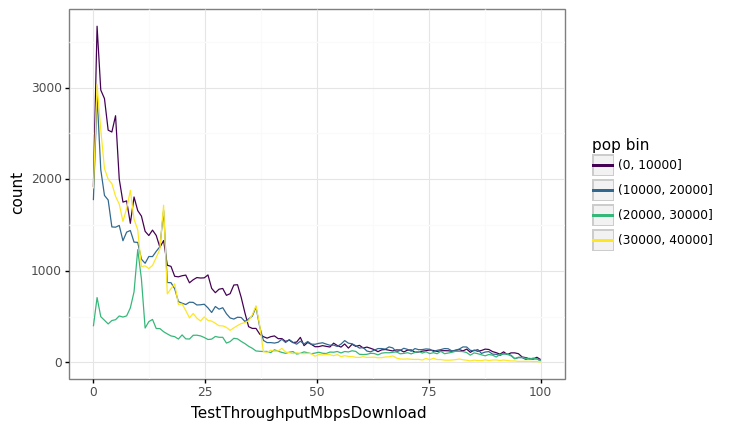

<ggplot: (-9223371868970548980)>

In [17]:
bins = np.arange(0,50000,10000)

plot_df = merged_data[['Population, 2016','TestThroughputMbpsDownload']].copy()
plot_df['pop bin'] = pd.cut(plot_df['Population, 2016'].values,bins)

plot_df = plot_df[plot_df['TestThroughputMbpsDownload'] < 100]

plot_df = plot_df.dropna()

(ggplot(plot_df) +
    aes(x='TestThroughputMbpsDownload', color='pop bin') +
    geom_freqpoly() +
    theme_bw())